<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="unilogoblack.jpeg" width="250px" style="display: inline-block; margin-top: 5px;">
<a href="http://www.python.org"><img src="Python-logo-notext.svg" width="70px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>


# Basic Scientific Python

J. D. Nichols 2015

## Section 6: Introducing Numpy

### Numpy, and importing modules

As we have seen, we can use the built-in Python objects to perform repetative operations.  However, we have used relatively small numbers of objects, and if we were to increase the numbers of iterations, we would quickly find that the time taken to perform these operations in Python is not negligible.  We also found that to make changes to a list (e.g. to square it) we had to manually tell the computer to loop over the whole array, which itself becomes somewhat repetitive after a while.

This is where Numpy comes in. Numpy stands for *Num*erical *Py*thon, and it cures both these problems.  It provides its own type, called an `NDArray`, which allows fast and easy operations on whole arrays at once. The key difference between Numpy's `NDArray`s and Python's lists is that all the elements in an `NDArray` are forced to be the same type of object, be it `int`s, `float`s or whatever.  Numpy's core code is written in C, and all the looping is done in that language, behind the scenes, with much less overhead than looping in Python.  The result is that, while the results are not *quite* as fast as pure C execution, the speed hit is probably much less than the gain in time created by the ease of use of Numpy relative to C.

Let's take a look at an example. First, you need to ensure that you run the following line every time you use this Notebook:

In [1]:
import numpy as np

In [ ]:
x = np.arange(100)
y = x**2
print y
print x[0]
print x[2:10:2]

Nice and easy!  But let's have a look at this. On line 1, we have the line 

```python
import numpy as np
```

This is the standard way of importing Numpy.  What do we mean by "import"?  Importing is one of the strengths of Python.  It allows an easy way to effectively 'copy-and-paste' a bundle of code (called a *module*, discussed later) into your program, and at the same time provides its own namespace.  This means that any variable or function associated with Numpy is accessed via `numpy.<something>`, and it is very clear what functions and variables belong to which bits of code.  This saves a lot of hassle!  In our example above, we have imported Numpy, and changed the name of the namespace to `np`, which saves a bit of typing and, as indicated, is now conventional practice.  

There is another way of importing modules, in which all of the objects in the module are dumped directly into your `__main__` namespace, thereby eliminating the need to write e.g. `"np."` before each function in that module.  This syntax is, using our Numpy example, 

```python
from numpy import *
```
which means "import everything from Numpy and stick it all in my namespace".  There are strongly-held opinions on both sides of the debate as to whether this is a good idea. In IPython, there is even the option

```python
from pylab import *
```

which imports everything from Numpy, Scipy, and Matplotlib  (we will meet these later).  There is no doubt that this saves on typing, and if you are familiar with these modules then you can generally avoid the problems that come with loading up your `__main__` namespace, e.g. overwriting object identifiers.  However, at this stage, we will stick to the "best practice" approach and use the standard, separate namespaces for all these modules. 

<div class="alert alert-success" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**INFO**</p>
<p>You might hear of a "Pythonic" way of doing things.  This means that the code is in conformity with the [Zen of Python](https://www.python.org/dev/peps/pep-0020/), one rule of which is "Explicit is better than implicit", i.e. make it blatantly obvious what you're doing.</p>
</div>

### Creating NDArrays, and using Numpy functions

Once we have imported Numpy (and we only have to do this once), we can use its functions.  To find out how many functions there are in Numpy, press `TAB` in the folllowing cell:

In [ ]:
np.BUFSIZE?

If you wish to know what a particular function does, remember you can type its name, with a following `'?'` to get some help. You should also make regular visits to the [Numpy docs](http://docs.scipy.org/doc/numpy/reference/).  

We used above the function `arange`, which as its name implies is similar to the pure Python `range` function we have used previously, but returns a Numpy `NDArray`. The syntax to call the function is as follows:

```python
result = np.arange(start=0, stop, step=1)
```
If start is not given, the list starts at zero, and if step is not given, it defaults to 1; this is also the case for `range`.  The type of the objects in the returned array is inferred from the type of the arguments, i.e. if they are `int`s, the output is an array of `int`s, etc.


#### Task 6.1
Use `np.arange` to produce arrays which

* Go from 10-30 in steps of 0.5
* Count backwards from 50 to 0


In [83]:
a = np.arange(10,30.25,0.5)
b = np.arange(50, -0.1, -1)
print a
print b

[ 10.   10.5  11.   11.5  12.   12.5  13.   13.5  14.   14.5  15.   15.5
  16.   16.5  17.   17.5  18.   18.5  19.   19.5  20.   20.5  21.   21.5
  22.   22.5  23.   23.5  24.   24.5  25.   25.5  26.   26.5  27.   27.5
  28.   28.5  29.   29.5  30. ]
[ 50.  49.  48.  47.  46.  45.  44.  43.  42.  41.  40.  39.  38.  37.  36.
  35.  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.  24.  23.  22.  21.
  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.  10.   9.   8.   7.   6.
   5.   4.   3.   2.   1.   0.]


Another way of creating arrays of sequential numbers is the function `np.linspace`:

In [ ]:
x = np.linspace(5, 25, 10)
print x

Using this function, we can specify the start and the end values, and the number of points. If we set the keyword 'retstep = True', we can also return the step in between each point:

In [ ]:
x, dx = np.linspace(5, 25, 10, retstep=True)
print x, dx

#### Task 6.2

Using `linspace`, create and print an array with 20 elements that goes from 20-30, along with the difference between each value.  Then, create an array that goes from 0.1 to 100 in 20 even steps on a logarithmic scale (check out the docstring for `logspace`).

In [36]:
print np.linspace(20, 30, 20, retstep = True)
print np.logspace(-1, 2, 20)

(array([ 20.        ,  20.52631579,  21.05263158,  21.57894737,
        22.10526316,  22.63157895,  23.15789474,  23.68421053,
        24.21052632,  24.73684211,  25.26315789,  25.78947368,
        26.31578947,  26.84210526,  27.36842105,  27.89473684,
        28.42105263,  28.94736842,  29.47368421,  30.        ]), 0.5263157894736842)
[   0.1           0.14384499    0.20691381    0.29763514    0.42813324
    0.61584821    0.88586679    1.27427499    1.83298071    2.6366509
    3.79269019    5.45559478    7.8475997    11.28837892   16.23776739
   23.35721469   33.59818286   48.32930239   69.51927962  100.        ]


Further useful ways of creating arrays are the following... 

#### Task 6.3 
Execute the following cell and write down what each (non-print) line does.

In [114]:
arr1 = np.zeros(10)
print arr1 
arr2 = np.ones(15)
print arr2
arr3 = np.array([1,6,3,6,9,3,6,4,8,5])
print arr3
arr4 = np.zeros_like(arr3)
print arr4
arr5 = np.array([3,6,9.])
print arr5

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[1 6 3 6 9 3 6 4 8 5]
[0 0 0 0 0 0 0 0 0 0]
[ 3.  6.  9.]


Double-click to edit me

Once we have our array, we can perform operations on the whole thing at once, as we did at the beginning of this section where  we squared the array. To multiply `arr3` by 10, we simply do:

In [50]:
print arr3*10

[10 60 30 60 90 30 60 40 80 50]


<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**IMPORTANT!**</p>
<p>Remember that, although multiplying a Python list by a number n produces a list with n copies of that list, multiplying a Numpy array by n returns an array in which each element is multiplied by that number.</p>
</div>

We can also index and slice the array, just as we did with lists:

In [113]:
print arr3[0]
print arr3[2:8:2]

1
[3 9 6]


However, note that in Numpy, the above slices are actually references to the original object in the computer's memory (not copies of the object, as is the behaviour for Python lists). 

Now take a look at the following:

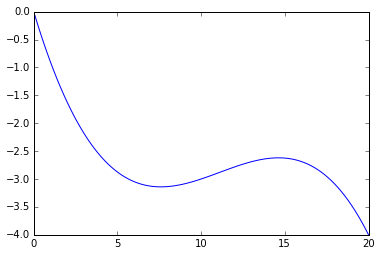

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

x = np.linspace(0,20, 100)
y = -0.003*x**3 + 0.1*x**2 - x
plt.plot(x,y)

On line 1 we have imported the `matplotlib` plotting library into the namespace `plt`.  Ignore lines 2 and 3 for now. We have then on line 5 created an array of sequencial numbers `x`, fed them into a 
cubic polynomial to produce values `y`, and then plotted `y` versus `x`. Note that the range of the plot axes are chosen automatically, but these can be changed, as we'll see later.  


#### Task 6.4

Create an array `t` that increases from 0 to $2\pi$ in a suitable number of steps, and plot $y=sin(t)$.

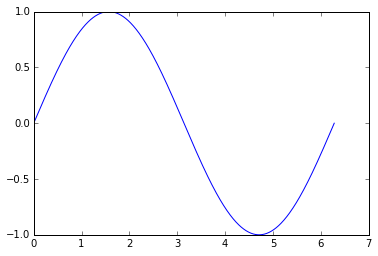

In [80]:
x = np.linspace(0, 2*np.pi, 628)
y = np.sin(x)
plt.plot(x,y)

#### Task 6.5

Try a few different functions, and plot them.  Numpy has quite a library to choose from!

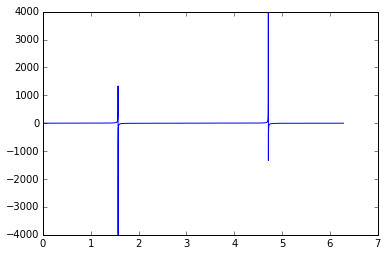

In [82]:
x = np.linspace(0, 2*np.pi, 6280)
y = np.tan(x)
plt.plot(x,y)

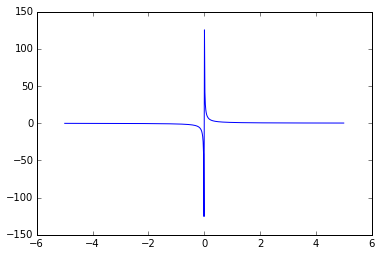

In [95]:
x = np.linspace(-5, 5, 628)
y = 1/x
plt.plot(x,y)

/cm/shared/apps/python/2.7.9/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


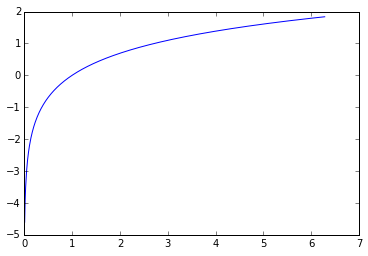

In [107]:
x = np.linspace(0, 2*np.pi, 628)
y = np.log(x)
plt.plot(x,y)

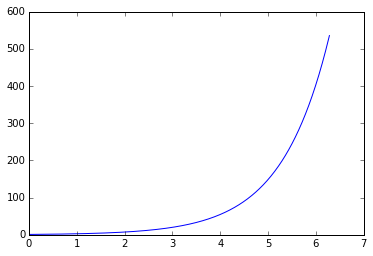

In [98]:
x = np.linspace(0, 2*np.pi, 628)
y = np.e**(x)
plt.plot(x,y)

Because the looping over Numpy arrays occurs in fast code behind the scenes, it is a golden rule that the ponderous Python loops should be avoided where at all possible, in favour of Numpy's functions.  This is clearly not always possible, but it's worth trying to limit their use as much as possible.

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**IMPORTANT!**</p>
<p>Loops are evil!</p>
</div>



#### Task 6.6
Now use Numpy functions to re-write your factorial code and your trapezium rule integration, both in one line!

In [178]:
def fact(x):
    """find the factorial of x which must be an integer"""
    return np.prod(np.linspace(1, x, x))

print fact(7)

def trap(y, x):
    """integrate by trapezium rule over y = x**2 from int to int """
    print np.trapz(np.linspace(y, x, x - y +1)**2, np.linspace(y, x, x - y + 1))
    
    
trap(0,10)

5040.0
335.0


AttributeError: 'module' object has no attribute 'factorial'

In [ ]:
.multiply

#### Task 6.7
Let's have a look at conditions again: Execute the following cell and write down what is happening.

In [191]:
x = np.arange(10)*2
#sets up an array of integers 0-9 inclusive and squares them
print x
inx = x > 10
#creates a list of the results of a boolean test if elements in ndarray > 10
print inx
print x[inx]
#prints the elemants of array x that > 10
print np.where(inx)[0]
#prints the indicies where x > 10

y = np.tile('Hamster', 10)
z = np.tile('Elderberries', 10)
#create an array of 10 "Hamster"/"Elderberies"
print y
print np.where(inx, y, z)
#print an array where if inx = True then y if inx = False the z

[ 0  2  4  6  8 10 12 14 16 18]
[False False False False False False  True  True  True  True] 1234
[12 14 16 18]
[6 7 8 9]
['Hamster' 'Hamster' 'Hamster' 'Hamster' 'Hamster' 'Hamster' 'Hamster'
 'Hamster' 'Hamster' 'Hamster']
['Elderberries' 'Elderberries' 'Elderberries' 'Elderberries' 'Elderberries'
 'Elderberries' 'Hamster' 'Hamster' 'Hamster' 'Hamster']


Double-click to edit me

One-dimensional arrays are sometimes called *vectors*, as they can be compared directly to these mathematical constructs.  However, it must be noted that array operations do not always correspond to vector operations.  For vector addition, we are OK:

In [192]:
x = np.array([3,5,4])
y = np.array([1,6,2])
print x + y

[ 4 11  6]


As mentioned above, the elements are operated on element-wise, i.e. the first elements are summed, the second are summed, etc.  This corresponds to the rules of vector addition.  However, for vector multiplication, there are two methods: taking the scalar (dot) and vector (cross) products, each with a different physical meaning, as has been covered in the Maths course.  Let's see what happens when we multiply two arrays together:

In [ ]:
print x*y

Note again that operations proceed element-wise.  If we want scalar and vector multiplication, we use Numpy functions:

In [ ]:
print np.dot(x,y)
print np.cross(x,y)

You can easily verify by hand that these results are as we expect.  

#### Task 6.8

An electron is moving with a velocity $\mathbf{v}(x,y,z)=(3.4,2.5,5.5)\;\mathrm{km\,s^{-1}}$ a region of space in which the magnetic field vector is $\mathbf{B}(x,y,z)=(5.4,8.2,6.5)\;\mathrm{nT}$ and the electric field is zero.  Calculate the acceleration due to the Lorentz force experienced by the electron.

In [200]:
v = np.array([3.4, 2.5, 5.5])*1000
b = np.array([5.4, 8.2, 6.5])*1e-9

a = 1.602e-19*(np.cross(v, b))/9.1e-31
print a

[-5078868.13186813  1337934.06593407  2531512.08791209]


<div class="alert alert-danger" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**Checkpoint: Please have the above marked and signed off by a demonstrator before continuing**</p>
</div>